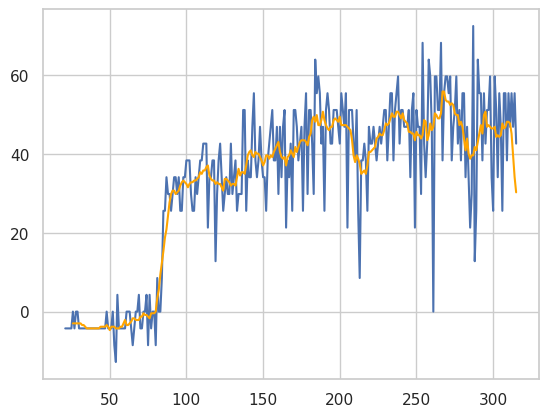

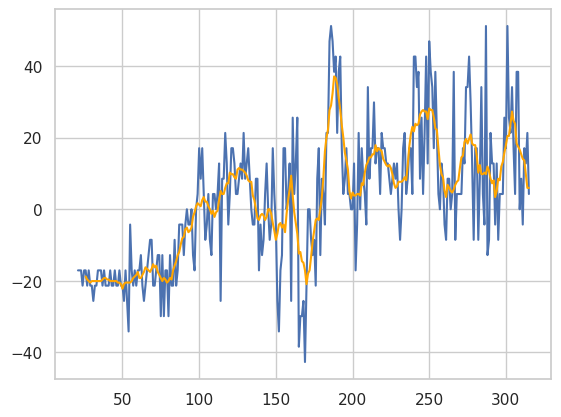

In [170]:
translation_peak = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/DEWAGD/DWDBCN51/200123/row_5/1/jai_translations_peak.csv")
translation_org = pd.read_csv("/media/fruitspec-lab/cam175/customers_new/DEWAGD/DWDBCN51/200123/row_5/1/jai_translations_org.csv")
plt.plot(translation_peak["frame"], translation_peak["tx"])
tx_conv = np.convolve(translation_peak["tx"], np.ones(10) / 10, mode='same')
plt.plot(translation_peak["frame"], tx_conv, color="orange")
plt.show()

plt.plot(translation_org["frame"], translation_org["tx"])
tx_conv = np.convolve(translation_org["tx"], np.ones(10) / 10, mode='same')
plt.plot(translation_org["frame"], tx_conv, color="orange")
plt.show()


In [121]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
df_res = pd.read_csv("/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS/models_3107_cleaner/trees.csv")
df_res.drop(["Unnamed: 0", "LGBMRegressor_3107_trees", "LGBMRegressor"], axis = 1, inplace = True)

In [125]:
[col for col in df_res.columns if col not in ["full_name", "F", "cv pred", "cv"]]

['XGBRegressor',
 'XGBRegressor_local',
 'LassoPipe',
 'GradientBoostingRegressor',
 'GradientBoostingRegressor_3107_trees',
 'RandomForestRegressor',
 'DecisionTreeRegressor',
 'HistGradientBoostingRegressor',
 'HistGradientBoostingRegressor_3107_trees']

In [126]:
mean_res = df_res[[col for col in df_res.columns if col
                   not in ["full_name", "F", "cv pred", "cv", 'LassoPipe', 'RandomForestRegressor']]].apply(np.mean, axis = 1)
df_res["StackedRegressor"] = mean_res
df_res["block"] = df_res["full_name"].apply(lambda x: x.split("_")[1])

# by block level

In [127]:
block_sum = df_res.groupby("block").sum()
F_res = block_sum["F"]
for col in block_sum.columns:
    if col != "F":
        block_sum[f"{col}_mape"] = np.abs(block_sum[col] - F_res)/F_res
mape_cols = [col for col in block_sum.columns if col.endswith("mape")]
block_sum[mape_cols]

/tmp/ipykernel_6340/2027968319.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  block_sum = df_res.groupby("block").sum()


,cv pred_mape,XGBRegressor_mape,XGBRegressor_local_mape,LassoPipe_mape,GradientBoostingRegressor_mape,GradientBoostingRegressor_3107_trees_mape,RandomForestRegressor_mape,DecisionTreeRegressor_mape,HistGradientBoostingRegressor_mape,HistGradientBoostingRegressor_3107_trees_mape,cv_mape,StackedRegressor_mape
block,,,,,,,,,,,,
2004XXXX,0.256365,0.398814,0.385074,0.329801,0.343607,0.331608,0.297997,0.366902,0.274914,0.315267,0.450484,0.345170
2005XXXX,0.101321,0.148876,0.000628,0.014531,0.019044,0.091293,0.143937,0.323187,0.033409,0.075858,0.194278,0.056363
2018NINA,0.261174,0.086722,0.093327,0.291499,0.176634,0.271563,0.384624,0.055556,0.211830,0.195799,0.086345,0.155919
2018XXXX,0.032989,0.181684,0.063173,0.006639,0.081877,0.048051,0.007876,0.066759,0.073052,0.016377,0.293978,0.052100
94000000,0.211599,0.336161,0.335739,0.393704,0.234454,0.246328,0.228783,0.163172,0.247609,0.226446,0.415398,0.255701
DWDBCL46,0.206942,0.305840,0.331279,0.186624,0.256940,0.225213,0.298776,0.342398,0.267457,0.192097,0.581871,0.274461
DWDBCN51,0.098554,0.115859,0.061739,0.043102,0.143437,0.063652,0.016107,0.087339,0.073573,0.012098,0.507034,0.051260
DWDBLE33,0.100456,0.452075,0.262015,0.098590,0.181405,0.264761,0.088683,0.237920,0.183721,0.271205,0.454457,0.264729
DWDBLE34,0.179069,0.069531,0.069866,0.118031,0.151980,0.206644,0.196980,0.102901,0.146246,0.206057,0.380679,0.116309


In [131]:
block_mape_means = block_sum[mape_cols].mean()
block_mape_stds = block_sum[mape_cols].std()
block_mape_max = block_sum[mape_cols].max()
block_mape_min = block_sum[mape_cols].min()
percent_80 = np.mean(block_sum[mape_cols] < 0.2)
percent_70 = np.mean(block_sum[mape_cols] < 0.3)
percent_60 = np.mean(block_sum[mape_cols] < 0.4)
percent_50 = np.mean(block_sum[mape_cols] < 0.5)
pd.DataFrame({"mean LBOCV": block_mape_means, "std LBOCV": block_mape_stds,
             "max LBOCV": block_mape_max, "min LBOCV": block_mape_min,
             ">80": percent_80, ">70": percent_70, ">60": percent_60, ">50": percent_50}
            ).sort_values("mean LBOCV").round(2)

/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()

,mean LBOCV,std LBOCV,max LBOCV,min LBOCV,>80,>70,>60,>50
GradientBoostingRegressor_mape,0.16,0.09,0.47,0.02,0.74,0.94,0.97,1.00
XGBRegressor_local_mape,0.17,0.13,0.45,0.00,0.71,0.81,0.94,1.00
StackedRegressor_mape,0.17,0.11,0.50,0.00,0.68,0.87,0.97,1.00
HistGradientBoostingRegressor_mape,0.17,0.10,0.53,0.03,0.71,0.94,0.97,0.97
GradientBoostingRegressor_3107_trees_mape,0.18,0.12,0.56,0.04,0.68,0.90,0.94,0.97
HistGradientBoostingRegressor_3107_trees_mape,0.18,0.13,0.58,0.01,0.61,0.90,0.94,0.97
cv pred_mape,0.18,0.14,0.58,0.00,0.58,0.87,0.94,0.94
RandomForestRegressor_mape,0.19,0.16,0.72,0.00,0.61,0.81,0.94,0.94
DecisionTreeRegressor_mape,0.20,0.15,0.58,0.01,0.58,0.77,0.90,0.94
LassoPipe_mape,0.20,0.15,0.59,0.01,0.58,0.77,0.90,0.94


In [129]:
pred_cols = df_res.iloc[:,2:-1].columns
df_mape = pd.DataFrame()
df_pe = pd.DataFrame()
for col in pred_cols:
    df_mape[col] = np.abs(df_res[col] - df_res["F"])/ df_res["F"]
    df_pe[col] = (df_res[col] - df_res["F"])/ df_res["F"]
df_mape["block"] = df_res["block"] 
df_pe["block"] = df_res["block"] 
block_stds = df_mape.groupby("block").std()
block_stds

,cv pred,XGBRegressor,XGBRegressor_local,LassoPipe,GradientBoostingRegressor,GradientBoostingRegressor_3107_trees,RandomForestRegressor,DecisionTreeRegressor,HistGradientBoostingRegressor,HistGradientBoostingRegressor_3107_trees,cv,StackedRegressor
block,,,,,,,,,,,,
2004XXXX,0.197688,0.138478,0.171936,0.134421,0.163046,0.138612,0.184129,0.211187,0.151839,0.150219,0.163775,0.150732
2005XXXX,0.117372,0.113776,0.088206,0.058701,0.086319,0.169764,0.167661,0.544863,0.076662,0.122157,0.160202,0.112141
2018NINA,0.232822,0.109030,0.123043,0.224726,0.150120,0.158756,0.206003,0.141992,0.157030,0.199265,0.106942,0.131918
2018XXXX,0.227210,0.169682,0.140808,0.155272,0.176940,0.177061,0.195968,0.226195,0.155536,0.162326,0.198921,0.155568
94000000,0.338434,0.264163,0.272423,0.581735,0.372636,0.527087,0.395413,0.268627,0.431727,0.573620,0.179386,0.394559
DWDBCL46,0.132867,0.151642,0.137204,0.134650,0.123736,0.134203,0.143206,0.173906,0.117719,0.157450,0.100742,0.123578
DWDBCN51,0.330981,0.171447,0.206825,0.164130,0.129207,0.123238,0.236329,0.291677,0.097421,0.223335,0.184315,0.150867
DWDBLE33,0.159913,0.152803,0.166348,0.176509,0.181342,0.186620,0.187544,0.188424,0.173756,0.196803,0.150813,0.163129
DWDBLE34,0.253813,0.096510,0.253225,0.194223,0.332533,0.313412,0.260980,0.285559,0.281921,0.313959,0.210185,0.255167


# By tree

In [146]:
tree_mape_means = df_mape.groupby("block")[pred_cols].mean().mean()
tree_mape_stds = df_mape.groupby("block")[pred_cols].mean().std()
tree_mape_max = df_mape.groupby("block")[pred_cols].mean().max()
tree_mape_min = df_mape.groupby("block")[pred_cols].mean().min()
percent_80 = np.mean(df_mape[pred_cols] < 0.2)
percent_70 = np.mean(df_mape[pred_cols] < 0.3)
percent_60 = np.mean(df_mape[pred_cols] < 0.4)
percent_50 = np.mean(df_mape[pred_cols] < 0.5)
print("MAPE of trees in inside a block")
pd.DataFrame({"mean MAPE tree (LBOCV)": tree_mape_means, "std MAPE tree (LBOCV)": tree_mape_stds,
             "max MAPE tree (LBOCV)": tree_mape_max, "min MAPE tree (LBOCV)": tree_mape_min,
             ">80": percent_80, ">70": percent_70, ">60": percent_60, ">50": percent_50}
            ).sort_values("mean MAPE tree (LBOCV)").round(2)

MAPE of trees in inside a block


/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,mean MAPE tree (LBOCV),std MAPE tree (LBOCV),max MAPE tree (LBOCV),min MAPE tree (LBOCV),>80,>70,>60,>50
XGBRegressor,0.32,0.16,1.04,0.13,0.42,0.63,0.76,0.85
StackedRegressor,0.33,0.24,1.51,0.16,0.45,0.62,0.77,0.86
XGBRegressor_local,0.33,0.23,1.45,0.15,0.43,0.60,0.75,0.83
GradientBoostingRegressor_3107_trees,0.33,0.26,1.60,0.09,0.48,0.63,0.75,0.85
GradientBoostingRegressor,0.33,0.25,1.56,0.15,0.38,0.59,0.76,0.83
HistGradientBoostingRegressor,0.33,0.29,1.79,0.13,0.43,0.62,0.75,0.84
HistGradientBoostingRegressor_3107_trees,0.34,0.25,1.46,0.12,0.45,0.61,0.73,0.82
LassoPipe,0.35,0.18,1.03,0.13,0.44,0.58,0.72,0.81
cv pred,0.36,0.35,2.07,0.07,0.47,0.66,0.76,0.84
RandomForestRegressor,0.37,0.30,1.75,0.12,0.41,0.54,0.68,0.75


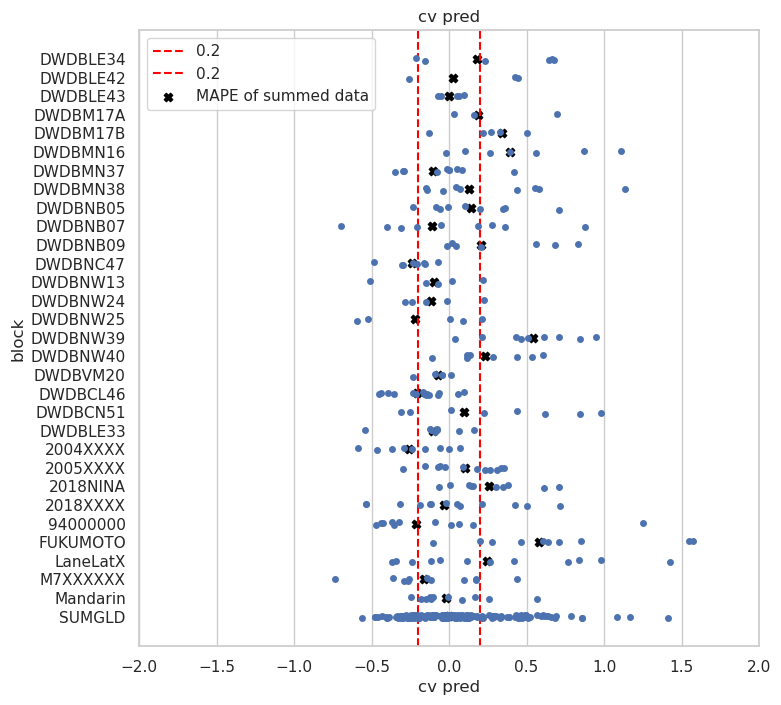

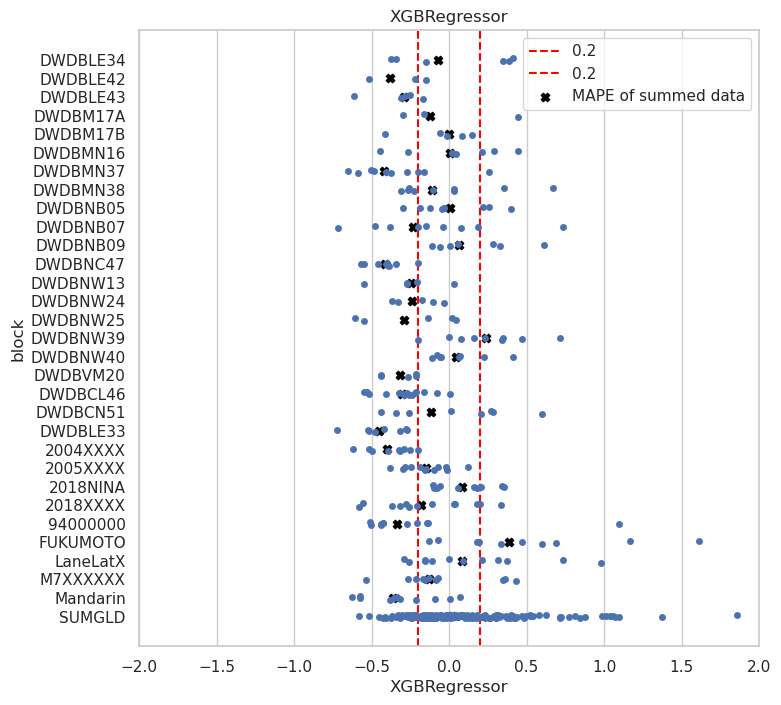

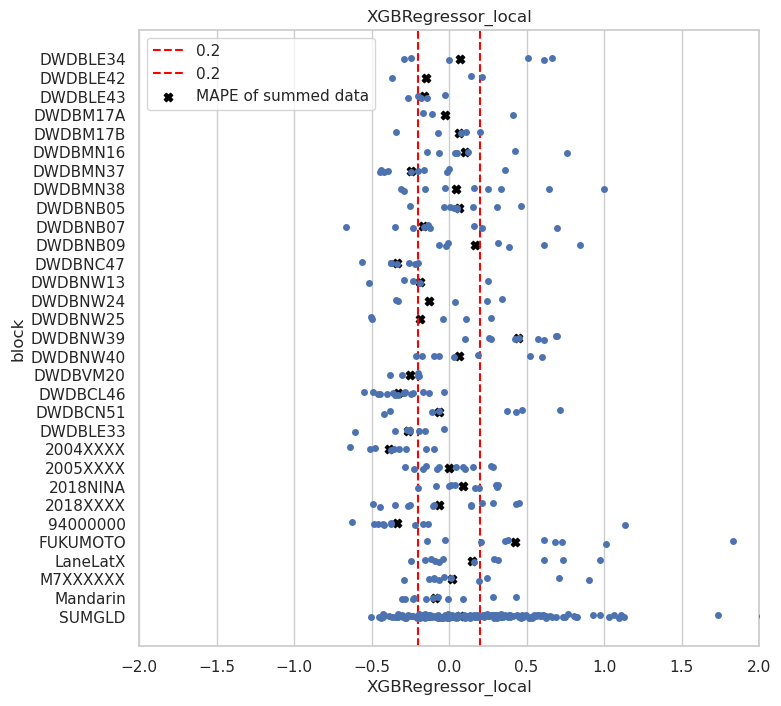

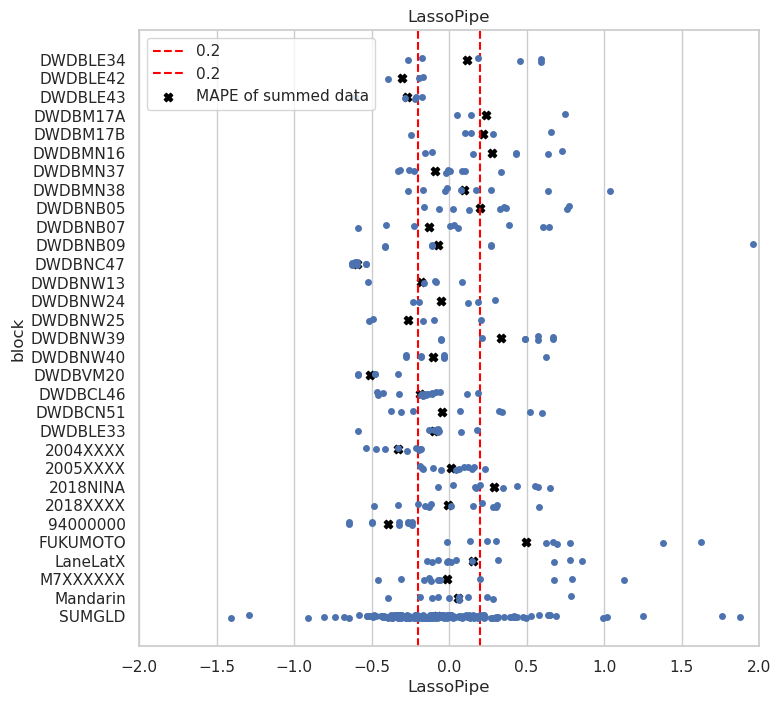

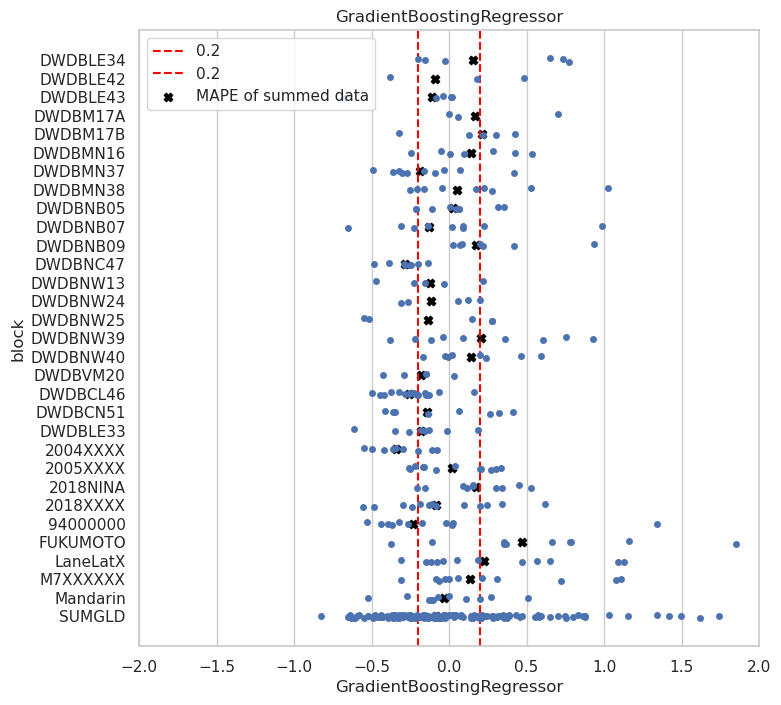

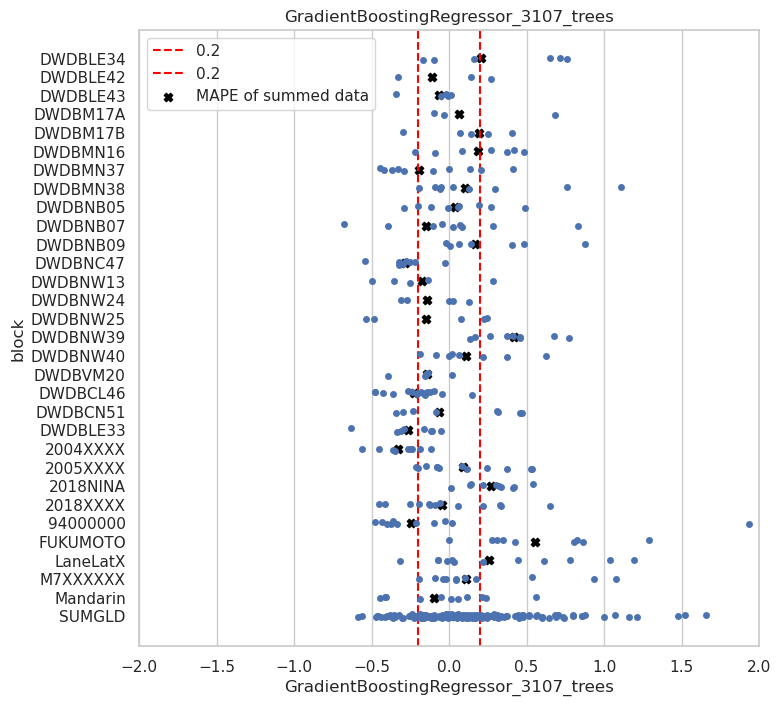

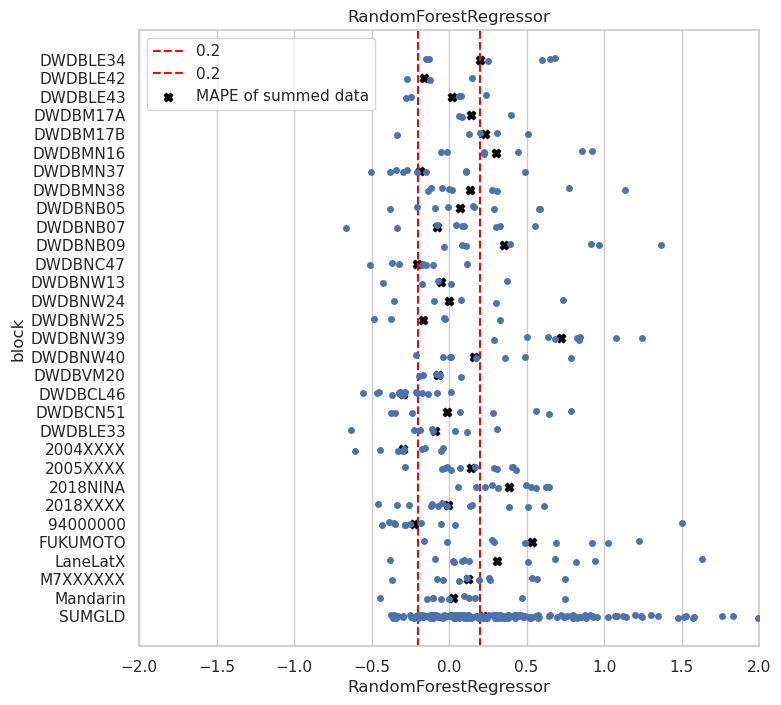

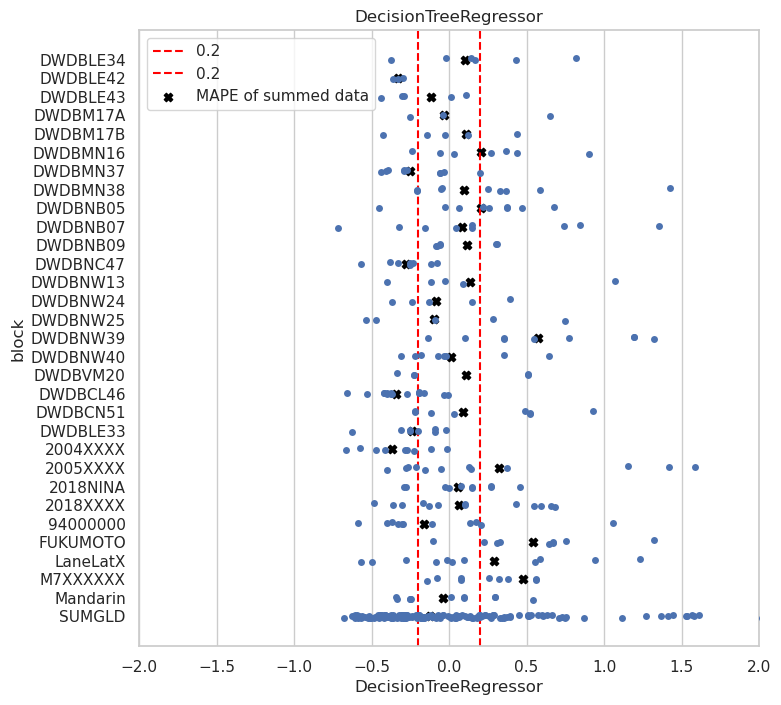

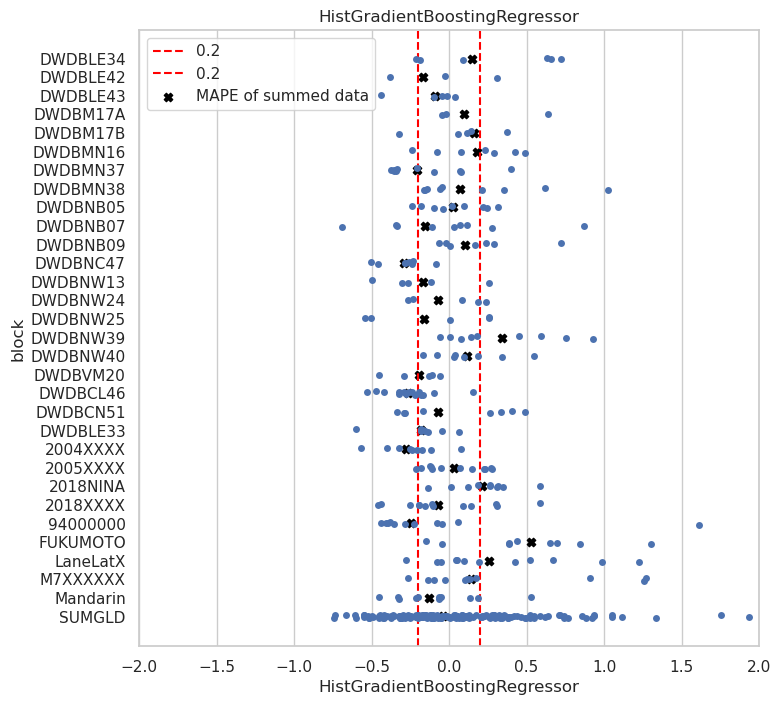

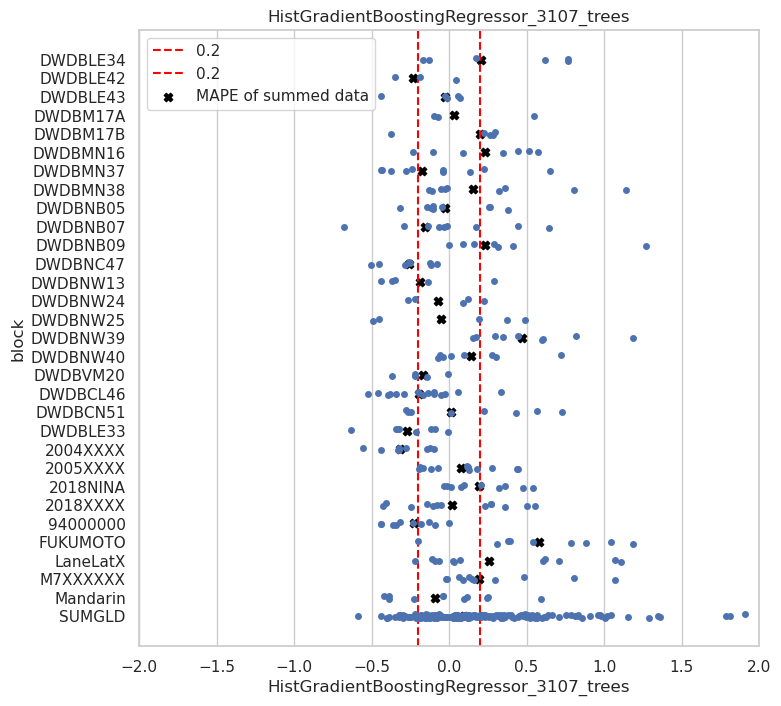

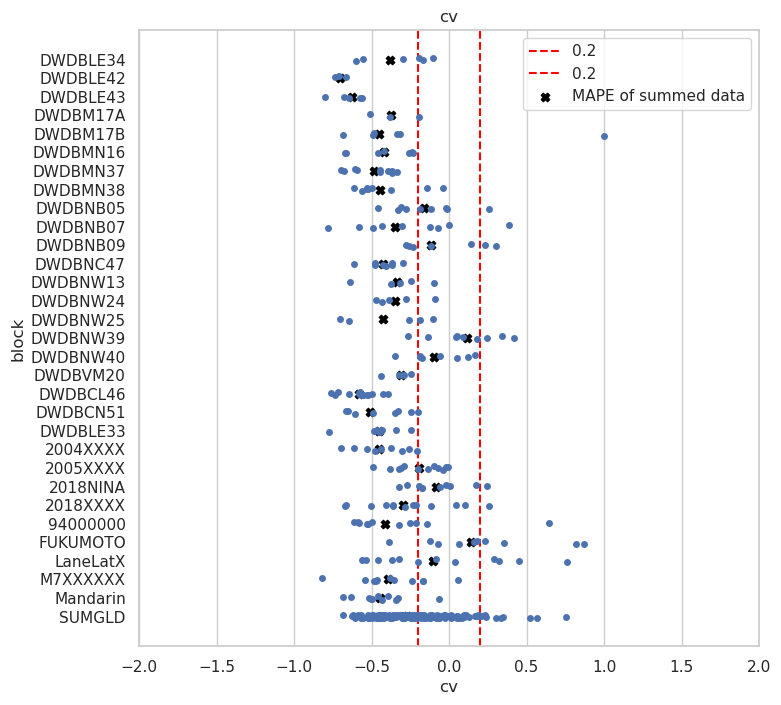

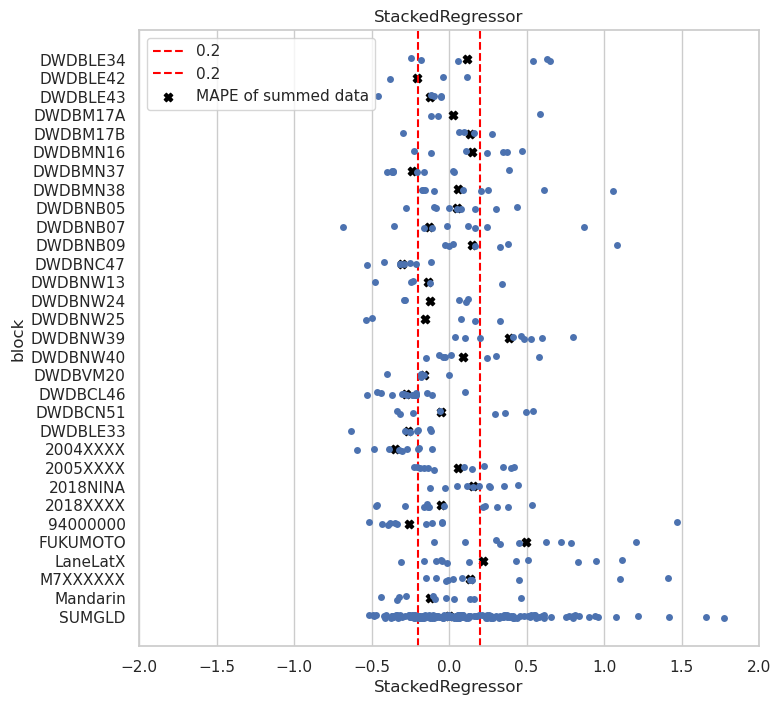

In [158]:
def plot_block_by_tree(col, zoom_in = 2):
    plt.figure(figsize=(8, 8))
    sns.stripplot(x=col, y='block', data=df_pe)
    plt.axvline(x=0.2, color='red', linestyle='--', label='0.2')
    plt.axvline(x=-0.2, color='red', linestyle='--', label='0.2')

    mean_values = df_pe.groupby('block')[col].mean()
    mean_values = block_sum[f"{col}_mape"]*((block_sum[f"{col}"] < block_sum["F"])*-2+1)
    plt.scatter(mean_values, block_sum.index, color='black', marker='X', label='MAPE of summed data')

    plt.legend()
    plt.title(col)
    if zoom_in:
        plt.xlim(-zoom_in, zoom_in)
    plt.show()


for col in pred_cols:
    plot_block_by_tree(col)
